In [2]:
import pandas as pd
import numpy as np
import datetime
import time

import matplotlib.pyplot as plt

## Data

### Unnormalized

In [3]:
# Read data
df = pd.read_csv('USD_IDR_bloomberg_features_engineered.csv')

df

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,open_change_perc,high_change_perc,low_change_perc,close_change_perc,prev_daily_range,daily_range_change,open_prev_close_change,volatility,prev_volatility,volatility_change
0,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,0.005495,-0.000869,0.000441,0.001434,145.0,-12.0,83.0,1.453552,1.593407,-0.139855
1,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,-0.006557,-0.001630,0.002537,0.006057,133.0,-38.0,10.0,1.045105,1.453552,-0.408447
2,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,0.007701,0.000000,0.005171,0.000219,95.0,-47.0,25.0,0.524017,1.045105,-0.521087
3,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,0.001638,0.001960,-0.002736,0.006129,48.0,43.0,38.0,0.991826,0.524017,0.467808
4,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,0.000327,0.001087,-0.001866,-0.010660,91.0,27.0,-15.0,1.285683,0.991826,0.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-10-21,15463.0,15498.0,15431.0,15495.0,1,15560.0,-60.0,-25.0,-16.0,...,-0.003865,-0.001611,-0.001036,0.001940,76.0,-9.0,-2.0,0.433292,0.489596,-0.056304
3130,2024-10-22,15534.0,15572.0,15534.0,15560.0,1,15620.0,71.0,74.0,103.0,...,0.004592,0.004775,0.006675,0.004195,67.0,-29.0,39.0,0.244625,0.433292,-0.188668
3131,2024-10-23,15590.0,15633.0,15590.0,15620.0,1,15584.0,56.0,61.0,56.0,...,0.003605,0.003917,0.003605,0.003856,38.0,5.0,30.0,0.275818,0.244625,0.031193
3132,2024-10-24,15640.0,15644.0,15580.0,15584.0,1,15640.0,50.0,11.0,-10.0,...,0.003207,0.000704,-0.000641,-0.002305,43.0,21.0,20.0,0.409207,0.275818,0.133389


In [22]:
# Read latest data
df = pd.read_csv('usd_idr_data.csv')

df

,date,open,high,low,close
0,1991-11-05,1977.0,1977.0,1977.0,1977.0
1,1991-11-06,1977.0,1977.0,1977.0,1977.0
2,1991-11-07,1977.0,1977.0,1977.0,1977.0
3,1991-11-08,1977.0,1977.0,1977.0,1977.0
4,1991-11-11,1977.0,1977.0,1977.0,1977.0
...,...,...,...,...,...
8384,2024-10-29,15737.0,15778.0,15737.0,15760.0
8385,2024-10-30,15747.0,15747.0,15700.0,15700.0
8386,2024-10-31,15700.0,15715.0,15695.0,15697.0
8387,2024-11-01,15718.0,15730.0,15713.0,15720.0


In [11]:
# Inserting newest data to the engineered data
df_new = pd.read_csv('usd_idr_20241025_20241104.csv', header=1)

df_new = df_new.rename(columns={'Unnamed: 0': 'date', 'High': 'high', 'Low': 'low', 'Last_Price': 'close', 'PX_OPEN': 'open' })

df_new = df_new[['date','open','high','low','close']]

df_new

,date,open,high,low,close
0,2024-10-25,15622.0,15643.0,15603.0,15640.0
1,2024-10-28,15711.0,15740.0,15711.0,15725.0
2,2024-10-29,15737.0,15778.0,15737.0,15760.0
3,2024-10-30,15747.0,15747.0,15700.0,15700.0
4,2024-10-31,15700.0,15715.0,15695.0,15697.0
5,2024-11-01,15718.0,15730.0,15713.0,15720.0
6,2024-11-04,15743.0,15770.0,15724.0,15753.0


In [16]:
# Step 1: Find the max date in df
max_date = df['date'].max()

# Step 2: Filter new_df for dates greater than max_date
filtered_df_new = df_new[df_new['date'] > max_date]

# Step 3: Append the filtered new_df to df
df = pd.concat([df, filtered_df_new], ignore_index=True)

# Step 4: Write the updated df to a CSV file
df.to_csv('usd_idr_data.csv', index=False)

print('Write Successfully!')

Write Successfully!


/home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2540: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [23]:
# Copy the df
df_feature = df.copy()

# Ensure 'date' is consistently used as a datetime format
df_feature['date'] = pd.to_datetime(df_feature['date'])

# Features Engineering

# Create the next_close column as the target variable to be predicted
df_feature['next_close'] = df_feature['close'].shift(-1)

# Count the next day gap
df_feature['gap_day'] = df_feature['date'].shift(-1) - df_feature['date']
# Convert gap_day to just the number of days and make it an integer
df_feature['gap_day'] = df_feature['gap_day'].dt.days.fillna(0).astype(int)

# Calculate the changes from the previous row for OHLC
df_feature['open_change'] = df_feature['open'].diff()
df_feature['high_change'] = df_feature['high'].diff()
df_feature['low_change'] = df_feature['low'].diff()
df_feature['close_change'] = df_feature['close'].diff()

# Function to calculate moving average over a custom date range
def custom_moving_average(df, close_col, date_col, days):
    averages = []
    for index, row in df.iterrows():
        current_date = row[date_col]
        # Get the date range
        start_date = current_date - pd.Timedelta(days=days)
        # Filter the DataFrame for the desired date range
        mask = (df[date_col] >= start_date) & (df[date_col] <= current_date)
        # Calculate the mean for the filtered values
        avg = df.loc[mask, close_col].mean()
        averages.append(avg)
    return averages

# Calculate the custom moving averages
df_feature['ma_close_5'] = custom_moving_average(df_feature, 'close', 'date', days=4)  # 4 previous days + today
df_feature['ma_close_10'] = custom_moving_average(df_feature, 'close', 'date', days=9)  # 9 previous days + today

# Capture previous values
df_feature['prev_open'] = df_feature['open'].shift(1)
df_feature['prev_high'] = df_feature['high'].shift(1)
df_feature['prev_low'] = df_feature['low'].shift(1)
df_feature['prev_close'] = df_feature['close'].shift(1)

# Add daily range (high-low)
df_feature['daily_range'] = df_feature['high'] - df_feature['low']

# Add gap change (today's open - previous close)
df_feature['gap_change'] = df_feature['open'] - df_feature['prev_close']

# Add close-to-moving average ratios
df_feature['close_ma5_ratio'] = df_feature['close'] / df_feature['ma_close_5']
df_feature['close_ma10_ratio'] = df_feature['close'] / df_feature['ma_close_10']

# Drop columns that are not needed for prediction
df_feature = df_feature[['date', 'open', 'high', 'low', 'close', 'gap_day', 
         'next_close', 'open_change', 'high_change', 
         'low_change', 'close_change', 'ma_close_5', 
         'ma_close_10', 'prev_open', 'prev_high', 
         'prev_low', 'prev_close', 'daily_range', 'gap_change',
         'close_ma5_ratio', 'close_ma10_ratio']]

# Others Features Engineering
df_feature['open_change_perc'] = df_feature['open_change'] / df_feature['prev_open']
df_feature['high_change_perc'] = df_feature['high_change'] / df_feature['prev_high']
df_feature['low_change_perc'] = df_feature['low_change'] / df_feature['prev_low']
df_feature['close_change_perc'] = df_feature['close_change'] / df_feature['prev_close']

df_feature['prev_daily_range'] = df_feature['prev_high'] - df_feature['prev_low']
df_feature['daily_range_change'] = df_feature['daily_range'] - df_feature['prev_daily_range']

df_feature['open_prev_close_change'] = df_feature['open'] - df_feature['prev_close']

df_feature['volatility'] = ((df_feature['high'] - df_feature['low']) / df_feature['open']) * 100
df_feature['prev_volatility'] = ((df_feature['prev_high'] - df_feature['prev_low']) / df_feature['prev_open']) * 100
df_feature['volatility_change'] = df_feature['volatility'] - df_feature['prev_volatility']

# Filter the DataFrame to include only rows from the year 2012 onwards
df_feature = df_feature[df_feature['date'] >= '2011-12-31']

df_feature

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,open_change_perc,high_change_perc,low_change_perc,close_change_perc,prev_daily_range,daily_range_change,open_prev_close_change,volatility,prev_volatility,volatility_change
5249,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,0.005495,-0.000869,0.000441,0.001434,145.0,-12.0,83.0,1.453552,1.593407,-0.139855
5250,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,-0.006557,-0.001630,0.002537,0.006057,133.0,-38.0,10.0,1.045105,1.453552,-0.408447
5251,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,0.007701,0.000000,0.005171,0.000219,95.0,-47.0,25.0,0.524017,1.045105,-0.521087
5252,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,0.001638,0.001960,-0.002736,0.006129,48.0,43.0,38.0,0.991826,0.524017,0.467808
5253,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,0.000327,0.001087,-0.001866,-0.010660,91.0,27.0,-15.0,1.285683,0.991826,0.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,2024-10-29,15737.0,15778.0,15737.0,15760.0,1,15700.0,26.0,38.0,26.0,...,0.001655,0.002414,0.001655,0.002226,29.0,12.0,12.0,0.260533,0.184584,0.075948
8385,2024-10-30,15747.0,15747.0,15700.0,15700.0,1,15697.0,10.0,-31.0,-37.0,...,0.000635,-0.001965,-0.002351,-0.003807,41.0,6.0,-13.0,0.298470,0.260533,0.037937
8386,2024-10-31,15700.0,15715.0,15695.0,15697.0,1,15720.0,-47.0,-32.0,-5.0,...,-0.002985,-0.002032,-0.000318,-0.000191,47.0,-27.0,0.0,0.127389,0.298470,-0.171081
8387,2024-11-01,15718.0,15730.0,15713.0,15720.0,3,15753.0,18.0,15.0,18.0,...,0.001146,0.000955,0.001147,0.001465,20.0,-3.0,21.0,0.108156,0.127389,-0.019232


### Normalized

In [23]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is already loaded with the given structure
# Define the columns for independent z-score scaling and the one using 'close' scaling
independent_zscore_cols = [
    'open', 'high', 'low', 'close', 
    'open_change', 'high_change', 'low_change', 'close_change',
    'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
    'prev_close', 'daily_range', 'gap_change', 'prev_daily_range', 
    'daily_range_change', 'open_prev_close_change'
]

# Calculate z-scores independently for each specified column
df_scaled = df.copy()
scaling_params = pd.DataFrame(columns=['column', 'mean', 'std'])

for col in independent_zscore_cols:
    mean, std = df[col].mean(), df[col].std()
    df_scaled[col] = (df[col] - mean) / std
    scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)

# Calculate mean and std for 'close' column to use on 'next_close'
close_mean, close_std = df['close'].mean(), df['close'].std()
df_scaled['next_close'] = (df['next_close'] - close_mean) / close_std

# Add 'next_close' scaling parameters
scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': ['next_close'], 'mean': [close_mean], 'std': [close_std]})], ignore_index=True)

# Output the scaled DataFrame and scaling parameters DataFrame
scaling_params, df_scaled

/tmp/ipykernel_1086701/3368896841.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)


(                    column          mean          std
 0                     open  13392.506701  1856.820019
 1                     high  13424.632419  1854.367566
 2                      low  13371.190172  1857.384269
 3                    close  13396.277281  1856.472401
 4              open_change      2.081047    56.256876
 5              high_change      2.053287    54.433314
 6               low_change      2.086790    55.678419
 7             close_change      2.097320    54.904389
 8               ma_close_5  13393.353260  1857.760498
 9              ma_close_10  13389.902724  1859.312209
 10               prev_open  13390.425654  1857.974932
 11               prev_high  13422.579132  1855.472763
 12                prev_low  13369.103382  1858.549521
 13              prev_close  13394.179962  1857.649279
 14             daily_range     53.442246    44.814990
 15              gap_change     -1.673261    32.520599
 16        prev_daily_range     53.475750    44.844177
 17      d

## Machine Learning Models

### Linear Regression

#### for unnormalized data

In [26]:
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df_feature.drop(['date', 'next_close'], axis=1)
target_df = df_feature['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = [440] # Optimum
# window_sizes = list(range(250, 451, 1))

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 340 | Avg Training RMSE: 48.407, Var RMSE: 195.964
Window size 340 | Avg Validation RMSE: 41.782, Var RMSE: 3970.310

Summary of RMSE Results for Each Window Size:


,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,340,0.005036,1508.159424,41.781921,3970.309788,0.000035,9.249674,0.300433,0.188771,23.045727,77.72676,48.406706,195.964467,0.17127,0.538655,0.359873,0.009545


In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df_feature.drop(['date', 'next_close'], axis=1)
target_df = df_feature['next_close']
date_df = df_feature['date']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
window_size = 440  # Optimal window size
gap = 1            # Step size of each window
num_display = 5    # Number of recent predictions to display

# Lists to store validation and training RMSEs (excluding the last window from avg calculations)
all_val_rmse = []
all_val_rmse_perc = []
all_train_rmse = []
all_train_rmse_perc = []

# Store predictions only for the final days
last_predictions = []

# Number of windows to process
num_windows = len(X) - window_size - 1  # Exclude last row for training

# Loop through each sliding window
window_number = 0
while window_number <= num_windows:
    start = window_number
    end = start + window_size
    X_train = X[start:end]
    y_train = y[start:end]

    # Prepare validation data for prediction
    if end < len(X) - 1:  # Ensure there's data for validation
        X_val = X[end:end + 1]  # Validation is the next row after the current window
        y_val = y[end:end + 1]  # The target for validation
        val_date = date_df.iloc[end:end + 1].values  # Get the date for validation

        # Skip this iteration if y_train contains NaN
        if np.isnan(y_train).any() or np.isnan(y_val).any():
            window_number += gap
            continue

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        y_pred_train = model.predict(X_train)
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors, excluding the last window from averages
        if end < len(X) - 1:  # Only add if it's not the last window
            all_val_rmse.append(rmse_val)
            all_val_rmse_perc.append(rmse_val_perc)
            all_train_rmse.append(rmse_train)
            all_train_rmse_perc.append(rmse_train_perc)

        # Check if we're in the last 3 windows to display
        if end >= len(X) - num_display:
            # Use the date for the next row as the prediction date
            next_row_date = date_df.iloc[end + 1]
            last_predictions.append((next_row_date, y_val[0], y_pred_val[0]))

    # Move to the next window based on the gap
    window_number += gap

# Use the features of the last row for prediction
if len(X) > 0:
    last_row_features = X[-1].reshape(1, -1)  # Reshape to 2D for prediction
    last_row_pred = model.predict(last_row_features)
    last_row_date = date_df.iloc[-1]

    # Append the last row prediction with the correct date
    last_predictions.append((last_row_date + pd.Timedelta(days=1), np.nan, last_row_pred[0]))

# Print the most recent predictions and actual values for the last three days
print("\nRecent Predictions and Actual Values:")
for i, (date, actual, pred) in enumerate(reversed(last_predictions)):
    if np.isnan(actual):
        print(f"Date: {date.date()}, Prediction: {pred:.0f}")
    else:
        error = abs(actual - pred)  # Calculate the absolute error
        error_perc = ((pred/actual)-1)*100
        print(f"Date: {date.date()}, Prediction: {pred:.0f}, Actual: {actual:.0f},  Error: {error:.0f}, Error %: {error_perc:.2f}%")


Recent Predictions and Actual Values:
Date: 2024-11-05, Prediction: 15742
Date: 2024-11-04, Prediction: 15743, Actual: 15753,  Error: 10, Error %: -0.06%
Date: 2024-11-01, Prediction: 15705, Actual: 15720,  Error: 15, Error %: -0.10%
Date: 2024-10-31, Prediction: 15680, Actual: 15697,  Error: 17, Error %: -0.11%
Date: 2024-10-30, Prediction: 15759, Actual: 15700,  Error: 59, Error %: 0.38%


In [46]:
# Send message to telegram

import requests

bot_token = '7965999652:AAFd7bcrumRIlHmc5GukSuLkAog70h8TUqM'
chat_id = '7586914842'

def send_message(text):
    url = f'https://api.telegram.org/bot{bot_token}/sendMessage'
    payload = {
        'chat_id': chat_id,
        'text': text
    }
    response = requests.post(url, json=payload)
    return response.json()

message = "USD/IDR Exchange Rate Prediction\n"
message += f"[{last_predictions[-1][0].date()}] Prediction : {last_predictions[-1][2]:.0f}\n"
message += "----------------------------------------\n"
message += "Last 4 Days Predictions:\n"

# Format the predictions and actual values for the last n days
for i, (date, actual, pred) in enumerate(reversed(last_predictions[:-1])):  # Exclude the last prediction
    message += (f"[{date.date()}] Prediction : {pred:.0f} | Actual : {actual:.0f}\n")

response = send_message(message)
print("Message Sent!")

Message Sent!


In [47]:
print(message)

USD/IDR Exchange Rate Prediction
[2024-11-05] Prediction : 15742
----------------------------------------
Last 4 Days Predictions:
[2024-11-04] Prediction : 15743 | Actual : 15753
[2024-11-01] Prediction : 15705 | Actual : 15720
[2024-10-31] Prediction : 15680 | Actual : 15697
[2024-10-30] Prediction : 15759 | Actual : 15700



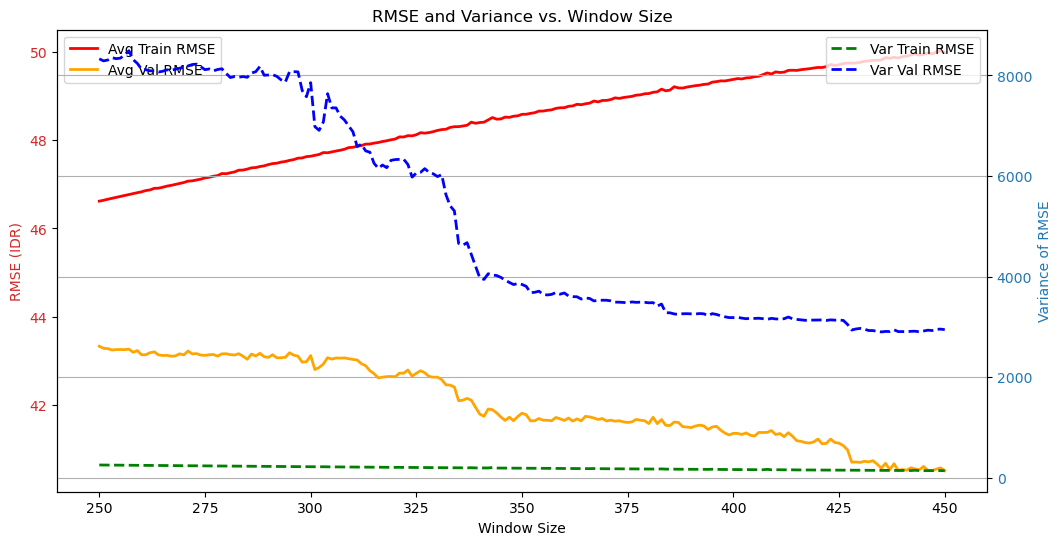

In [25]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

#### for normalized data (z-score method)

In [26]:
# For Z-Score Normalization, use df_scaled instead of df

from sklearn.linear_model import LinearRegression

# Assume close_mean and close_std are the mean and std for 'next_close' calculated during normalization
close_mean, close_std = scaling_params.loc[scaling_params['column'] == 'next_close', ['mean', 'std']].values[0]

# Separate df_scaled into features and target
features_df = df_scaled.drop(['date', 'next_close'], axis=1)
target_df = df_scaled['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = [440] # Optimum
window_sizes = list(range(250, 451, 1))

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation and training data
        y_pred_val = model.predict(X_val)
        y_pred_train = model.predict(X_train)

        # Denormalize predictions
        y_pred_val_denorm = (y_pred_val * close_std) + close_mean
        y_pred_train_denorm = (y_pred_train * close_std) + close_mean
        y_val_denorm = (y_val * close_std) + close_mean
        y_train_denorm = (y_train * close_std) + close_mean

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val_denorm - y_pred_val_denorm) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val_denorm)[0] * 100  # Convert to percentage

        # Calculate RMSE and RMSE percentage for training
        mse_train = np.mean((y_train_denorm - y_pred_train_denorm) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train_denorm).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 250 | Avg Training RMSE: 46.616, Var RMSE: 254.694
Window size 250 | Avg Validation RMSE: 43.316, Var RMSE: 8328.338
Window size 251 | Avg Training RMSE: 46.638, Var RMSE: 254.018
Window size 251 | Avg Validation RMSE: 43.287, Var RMSE: 8288.674
Window size 252 | Avg Training RMSE: 46.659, Var RMSE: 253.314
Window size 252 | Avg Validation RMSE: 43.270, Var RMSE: 8310.151
Window size 253 | Avg Training RMSE: 46.683, Var RMSE: 252.635
Window size 253 | Avg Validation RMSE: 43.231, Var RMSE: 8359.506
Window size 254 | Avg Training RMSE: 46.702, Var RMSE: 251.923
Window size 254 | Avg Validation RMSE: 43.229, Var RMSE: 8334.446
Window size 255 | Avg Training RMSE: 46.723, Var RMSE: 251.224
Window size 255 | Avg Validation RMSE: 43.244, Var RMSE: 8346.501
Window size 256 | Avg Training RMSE: 46.746, Var RMSE: 250.550
Window size 256 | Avg Validation RMSE: 43.241, Var RMSE: 8399.837
Window size 257 | Avg Training RMSE: 46.767, Var RMSE: 249.802
Window size 257 | Avg Validation R

,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,250,0.030146,2382.068404,43.315776,8328.337979,0.000218,15.302043,0.312229,0.382604,16.813926,87.550543,46.616330,254.694111,0.148662,0.604380,0.346224,0.012104
1,251,0.026744,2377.514693,43.286612,8288.673576,0.000190,15.306010,0.311970,0.381148,16.805453,87.441397,46.638468,254.018192,0.148746,0.603803,0.346393,0.012073
2,252,0.008790,2381.596064,43.270023,8310.151079,0.000065,15.307859,0.311805,0.382013,16.801274,87.270502,46.659355,253.313553,0.148742,0.602718,0.346555,0.012043
3,253,0.044746,2385.369669,43.231102,8359.506480,0.000388,15.371810,0.311459,0.384064,16.884096,87.132192,46.682584,252.635393,0.148805,0.601781,0.346734,0.012013
4,254,0.012860,2379.560695,43.229180,8334.446024,0.000089,15.126900,0.311385,0.381800,16.877162,87.037575,46.702352,251.922811,0.149079,0.601232,0.346889,0.011982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,446,0.001102,1325.132301,40.508244,2937.012657,0.000008,8.127153,0.287997,0.135182,26.730897,72.597331,49.941546,142.550476,0.199792,0.506971,0.371613,0.007420
197,447,0.017528,1318.238254,40.487250,2928.124021,0.000123,8.084871,0.287843,0.134866,26.799178,72.544629,49.949657,142.172149,0.200282,0.506847,0.371669,0.007405
198,448,0.018402,1350.135858,40.501232,2954.009376,0.000138,8.280502,0.287931,0.135840,26.852065,72.682663,49.961955,141.701775,0.200656,0.507763,0.371758,0.007385
199,449,0.009137,1350.118369,40.519336,2957.051522,0.000065,8.280395,0.288046,0.135954,26.860197,72.619987,49.971459,141.289766,0.200695,0.507289,0.371826,0.007367


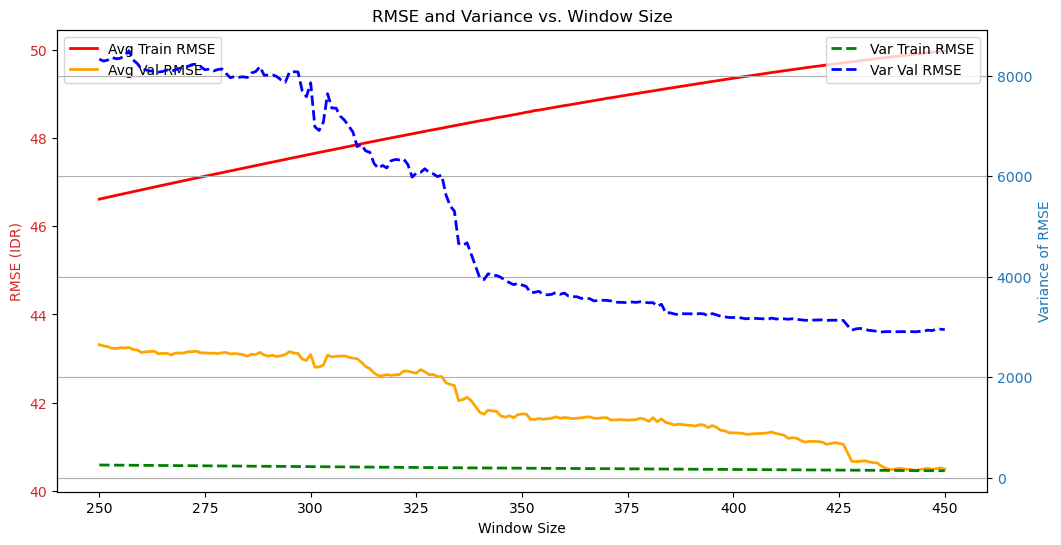

In [27]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

### Decision Tree

In [54]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Define parameters for sliding window approach
num_predictions = 1  # Number of rows to predict
gap = 1              # Gap (number of rows to skip after each window)
max_windows = 50     # Maximum number of windows to process
set_limit = False    # Set to True to limit number of windows processed

# Define list of window sizes and max depth values for the decision tree
window_sizes = list(range(180, 501, 20))   # 180 (Optimum)
max_depths = [4, 5, 6]          # 5 (Optimum)

# Store results
results = []

# Loop through each combination of window size and max depth
for window_size in window_sizes:
    for max_depth in max_depths:
        
        # Lists to store RMSEs and percentage errors
        all_val_rmse = []
        all_train_rmse = []

        # Calculate number of windows based on dataset size
        num_windows = len(X) - window_size - num_predictions
        if set_limit:
            num_windows = min(num_windows, max_windows)

        # Loop through each sliding window with the specified gap
        window_number = 0
        while window_number < num_windows:
            start = window_number
            end = start + window_size
            X_train = X[start:end]
            y_train = y[start:end]

            # Validation data
            X_val = X[end:end + num_predictions]
            y_val = y[end:end + num_predictions]

            # Initialize and fit the Decision Tree model with specified max_depth
            model = DecisionTreeRegressor(max_depth=max_depth)
            model.fit(X_train, y_train)

            # Predict on validation data
            y_pred_val = model.predict(X_val)
            # Predict on training data
            y_pred_train = model.predict(X_train)

            # Calculate RMSE for validation
            mse_val = np.mean((y_val - y_pred_val) ** 2)
            rmse_val = np.sqrt(mse_val)

            # Calculate RMSE for training
            mse_train = np.mean((y_train - y_pred_train) ** 2)
            rmse_train = np.sqrt(mse_train)

            # Append RMSEs to lists
            all_val_rmse.append(rmse_val)
            all_train_rmse.append(rmse_train)

            # Move to the next window based on the gap
            window_number += gap

        # Calculate averages and variances for validation and training RMSEs
        avg_val_rmse = np.mean(all_val_rmse)
        var_val_rmse = np.var(all_val_rmse)

        avg_train_rmse = np.mean(all_train_rmse)
        var_train_rmse = np.var(all_train_rmse)

        # Store results
        results.append({
            'window_size': window_size,
            'max_depth': max_depth,
            'avg_val_rmse': avg_val_rmse,
            'var_val_rmse': var_val_rmse,
            'avg_train_rmse': avg_train_rmse,
            'var_train_rmse': var_train_rmse,
        })

        # Print results for current combination of window size and max depth
        print(f'Window size {window_size}, Max Depth {max_depth} | '
              f'Avg Training RMSE: {avg_train_rmse:.3f}, Var Training RMSE: {var_train_rmse:.3f} | '
              f'Avg Validation RMSE: {avg_val_rmse:.3f}, Var Validation RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame for easy analysis
results_summary = pd.DataFrame(results)

# Print the summary DataFrame
print("\nSummary of RMSE Results for Each Window Size and Max Depth:")
print(results_summary)

Window size 180, Max Depth 4 | Avg Training RMSE: 38.147, Var Training RMSE: 238.717 | Avg Validation RMSE: 52.195, Var Validation RMSE: 3820.735
Window size 180, Max Depth 5 | Avg Training RMSE: 27.704, Var Training RMSE: 103.111 | Avg Validation RMSE: 52.405, Var Validation RMSE: 3517.631
Window size 180, Max Depth 6 | Avg Training RMSE: 19.387, Var Training RMSE: 46.858 | Avg Validation RMSE: 54.576, Var Validation RMSE: 4126.963
Window size 200, Max Depth 4 | Avg Training RMSE: 39.804, Var Training RMSE: 238.792 | Avg Validation RMSE: 52.758, Var Validation RMSE: 3715.166
Window size 200, Max Depth 5 | Avg Training RMSE: 29.168, Var Training RMSE: 107.402 | Avg Validation RMSE: 52.338, Var Validation RMSE: 3555.950
Window size 200, Max Depth 6 | Avg Training RMSE: 20.756, Var Training RMSE: 51.086 | Avg Validation RMSE: 52.949, Var Validation RMSE: 3653.999
Window size 220, Max Depth 4 | Avg Training RMSE: 41.356, Var Training RMSE: 242.164 | Avg Validation RMSE: 51.907, Var Valida

In [56]:
results_summary

,window_size,max_depth,avg_val_rmse,var_val_rmse,avg_train_rmse,var_train_rmse
0,180,4,52.195054,3820.734644,38.147413,238.716964
1,180,5,52.404887,3517.631163,27.703861,103.111043
2,180,6,54.575945,4126.963496,19.386516,46.858306
3,200,4,52.757882,3715.165785,39.804192,238.792005
4,200,5,52.337807,3555.949698,29.168021,107.402335
5,200,6,52.948940,3653.998807,20.756010,51.085770
6,220,4,51.907377,3385.458662,41.355913,242.164259
7,220,5,51.453811,3329.371688,30.488328,110.703622
8,220,6,53.881435,3999.410386,21.915480,54.511761
9,240,4,52.513181,3729.946604,42.782344,244.679603


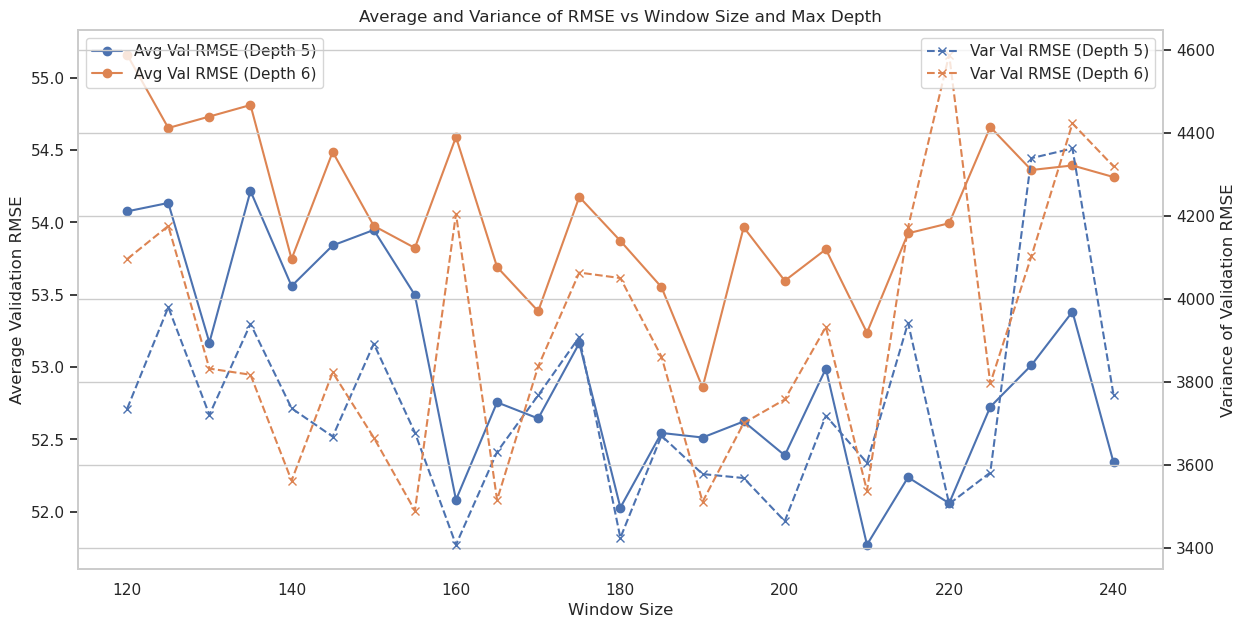

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_summary' is already defined as a DataFrame
result_summary = pd.DataFrame({
    'window_size': [120, 120, 125, 125, 130, 130, 135, 135, 140, 140, 
                    145, 145, 150, 150, 155, 155, 160, 160, 165, 165,
                    170, 170, 175, 175, 180, 180, 185, 185, 190, 190,
                    195, 195, 200, 200, 205, 205, 210, 210, 215, 215,
                    220, 220, 225, 225, 230, 230, 235, 235, 240, 240],
    'max_depth': [5, 6] * 25,
    'avg_val_rmse': [54.076809, 55.159319, 54.134955, 54.653057, 53.169785,
                     54.732229, 54.217525, 54.811818, 53.560469, 53.747462,
                     53.841276, 54.487516, 53.948231, 53.976513, 53.498440,
                     53.824018, 52.083127, 54.590517, 52.756765, 53.692121,
                     52.645371, 53.386944, 53.165826, 54.176573, 52.029342,
                     53.872742, 52.545200, 53.553123, 52.513674, 52.859433,
                     52.624818, 53.966877, 52.390159, 53.597313, 52.989646,
                     53.814468, 51.772421, 53.238592, 52.238581, 53.925250,
                     52.059147, 53.994805, 52.725226, 54.659754, 53.013318,
                     54.362566, 53.383093, 54.394148, 52.340975, 54.313966],
    'var_val_rmse': [3735.215313, 4095.783268, 3979.726030, 4175.577157, 3720.177627,
                     3831.742628, 3939.523071, 3816.928053, 3736.046304, 3561.594430,
                     3667.798087, 3822.490756, 3891.795908, 3665.338794, 3677.591543,
                     3489.281653, 3407.092929, 4204.709048, 3630.762371, 3515.238496,
                     3767.368775, 3836.821877, 3907.722783, 4063.207512, 3423.736862,
                     4049.915811, 3669.862172, 3860.732993, 3577.481358, 3510.648343,
                     3567.913074, 3700.297482, 3463.865558, 3757.257011, 3717.957073,
                     3932.069977, 3604.741590, 3537.545938, 3941.930613, 4172.319420,
                     3505.482412, 4588.237396, 3581.143755, 3795.950432, 4338.941899,
                     4102.270573, 4362.309571, 4422.617600, 3767.849981, 4319.044245],
    'avg_train_rmse': [22.109815, 14.734573, 22.621122, 15.158858, 23.111949,
                       15.537447, 23.621741, 16.010901, 24.126132, 16.426744,
                       24.613107, 16.855894, 25.094659, 17.241435, 25.592306,
                       17.643344, 26.056894, 18.007325, 26.517137, 18.402694,
                       26.940799, 18.764494, 27.325084, 19.071946, 27.703449,
                       19.386363, 28.068688, 19.712906, 28.460871, 20.077731,
                       28.831682, 20.438552, 29.167947, 20.756103, 29.471604,
                       21.015382, 29.837801, 21.345427, 30.152611, 21.624644,
                       30.488084, 21.915820, 30.825195, 22.226975, 31.131275,
                       22.544873, 31.441970, 22.829502, 31.759097, 23.126480],
    'var_train_rmse': [87.645987, 35.836076, 89.169693, 36.847571, 90.161280,
                       37.055897, 92.674785, 38.722684, 94.269755, 39.751509,
                       95.294011, 40.872526, 96.167668, 41.863946, 97.598030,
                       42.992782, 98.718331, 43.680055, 100.299364, 44.722168,
                       101.255367, 45.441555, 101.550277, 45.856238, 103.109269,
                       46.857140, 104.235015, 47.499066, 105.998531, 48.928697,
                       107.089341, 50.210857, 107.401886, 51.084423, 107.126622,
                       51.414019, 108.957162, 52.596658, 109.758087, 53.486738,
                       110.703495, 54.512782, 111.715889, 55.533695, 112.056864,
                       56.385892, 112.390537, 57.258450, 112.887669, 58.253557]
})

# Create a new figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average validation RMSE on the first y-axis
for depth in result_summary['max_depth'].unique():
    subset = result_summary[result_summary['max_depth'] == depth]
    ax1.plot(subset['window_size'].values, subset['avg_val_rmse'].values, marker='o', label=f'Avg Val RMSE (Depth {depth})')
ax1.set_xlabel('Window Size')
ax1.set_ylabel('Average Validation RMSE')
ax1.tick_params(axis='y')

# Create a second y-axis for variance of validation RMSE
ax2 = ax1.twinx()
for depth in result_summary['max_depth'].unique():
    subset = result_summary[result_summary['max_depth'] == depth]
    ax2.plot(subset['window_size'].values, subset['var_val_rmse'].values, marker='x', linestyle='--', label=f'Var Val RMSE (Depth {depth})')
ax2.set_ylabel('Variance of Validation RMSE')
ax2.tick_params(axis='y')

# Add title and legend
plt.title('Average and Variance of RMSE vs Window Size and Max Depth')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show grid
ax1.grid()

# Show the plot
plt.show()

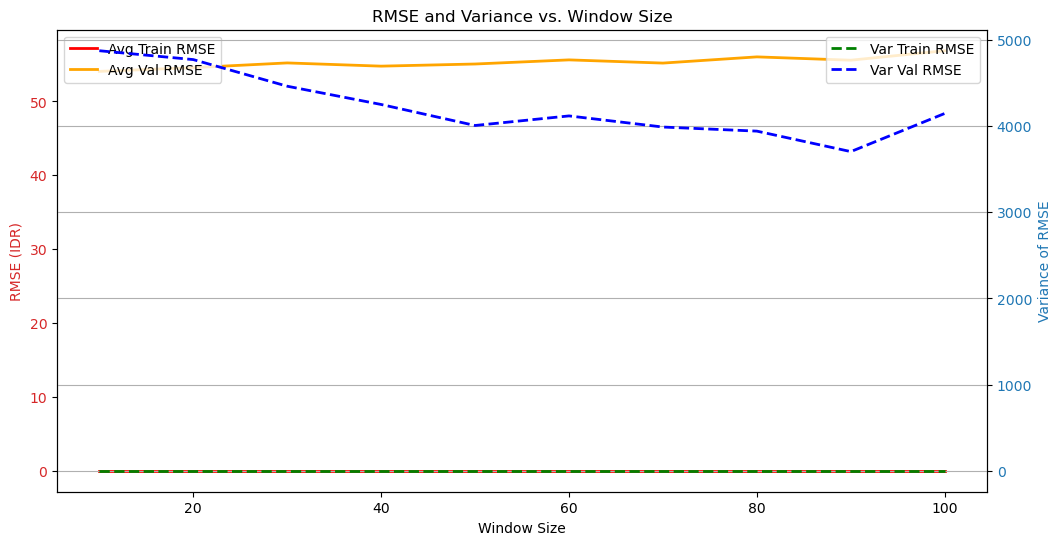

In [7]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes and max depths
window_sizes = list(range(100, 111, 10))
max_depths = [1,4,5]  # Example max depth values

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:
    # Loop through each max depth
    for max_depth in max_depths:
        print(f'Window Size: {window_size} | Max Depth: {max_depth}')
        # Initiate lists to store RMSEs and percentages
        all_val_rmse = []
        all_train_rmse = []

        # Calculate the number of windows based on dataset size
        num_windows = len(X) - window_size - num_predictions

        # Apply maximum window limit if set
        if set_limit:
            num_windows = min(num_windows, max_windows)

        # Loop through each sliding window with the gap applied
        window_number = 0
        while window_number < num_windows:
            start = window_number
            end = start + window_size
            X_train = X[start:end]
            y_train = y[start:end]

            # Prepare validation data for prediction
            X_val = X[end:end + num_predictions]
            y_val = y[end:end + num_predictions]

            # Initialize and fit the Random Forest model
            model = RandomForestRegressor(max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)

            # Predict on validation data
            y_pred_val = model.predict(X_val)
            # Predict on training data
            y_pred_train = model.predict(X_train)

            # Calculate RMSE for validation
            mse_val = np.mean((y_val - y_pred_val) ** 2)
            rmse_val = np.sqrt(mse_val)

            # Calculate RMSE for training
            mse_train = np.mean((y_train - y_pred_train) ** 2)
            rmse_train = np.sqrt(mse_train)

            # Append RMSEs
            all_val_rmse.append(rmse_val)
            all_train_rmse.append(rmse_train)

            # Move to the next window based on the gap
            window_number += gap

        # Calculate average, min, max, and variance for validation and training RMSEs
        avg_val_rmse = np.mean(all_val_rmse)
        min_val_rmse = min(all_val_rmse)
        max_val_rmse = max(all_val_rmse)
        var_val_rmse = np.var(all_val_rmse)

        avg_train_rmse = np.mean(all_train_rmse)
        min_train_rmse = min(all_train_rmse)
        max_train_rmse = max(all_train_rmse)
        var_train_rmse = np.var(all_train_rmse)

        # Append results to the list
        results.append({
            'window_size': window_size,
            'max_depth': max_depth,
            'min_val_rmse': min_val_rmse,
            'max_val_rmse': max_val_rmse,
            'avg_val_rmse': avg_val_rmse,
            'var_val_rmse': var_val_rmse,
            'min_train_rmse': min_train_rmse,
            'max_train_rmse': max_train_rmse,
            'avg_train_rmse': avg_train_rmse,
            'var_train_rmse': var_train_rmse,
        })

        # Print results for the current window size and max depth
        print(f'Avg Training RMSE: {avg_train_rmse:.3f}, Var Training RMSE: {var_train_rmse:.3f}, Avg Validation RMSE: {avg_val_rmse:.3f}, Var Validation RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size and Max Depth:")
print(results_summary)

Window Size: 100 | Max Depth: 1
Avg Training RMSE: 100.612, Var Training RMSE: 4398.506, Avg Validation RMSE: 125.554, Var Validation RMSE: 18259.180
Window Size: 100 | Max Depth: 4
Avg Training RMSE: 29.006, Var Training RMSE: 201.272, Avg Validation RMSE: 48.881, Var Validation RMSE: 3596.700
Window Size: 100 | Max Depth: 5
Avg Training RMSE: 24.688, Var Training RMSE: 146.250, Avg Validation RMSE: 48.288, Var Validation RMSE: 3459.797
Window Size: 110 | Max Depth: 1
Avg Training RMSE: 106.195, Var Training RMSE: 4728.267, Avg Validation RMSE: 133.745, Var Validation RMSE: 19925.308
Window Size: 110 | Max Depth: 4
Avg Training RMSE: 29.911, Var Training RMSE: 201.967, Avg Validation RMSE: 47.969, Var Validation RMSE: 3438.764
Window Size: 110 | Max Depth: 5
Avg Training RMSE: 25.268, Var Training RMSE: 145.255, Avg Validation RMSE: 47.355, Var Validation RMSE: 3338.815

Summary of RMSE Results for Each Window Size and Max Depth:
   window_size  max_depth  min_val_rmse  max_val_rmse  

In [1]:
results_summary

NameError: name 'results_summary' is not defined

## Deep Learning Models

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

# to ignore warning
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Define parameters for the sliding windows and neural network configurations
window_sizes = [180, 200, 220, 240, 260, 280, 300]
hidden_layer_sizes_options = [(10,), (20,), (10, 10)]  # Experiment with 1-3 layers

# Define a function to calculate RMSE manually
def calculate_rmse(y_true, y_pred):
    squared_diffs = (y_true - y_pred) ** 2
    mean_squared_diff = np.mean(squared_diffs)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

# Store results
results = []

# Features and target
features = df.columns.drop('next_close','date')  # Assuming 'next_price' is the target variable
target = 'next_close'

# HITS loop: iterate over each window size and hidden layer configuration
for window_size in window_sizes:
    for hidden_layers in hidden_layer_sizes_options:
        print(f'Window Size: {window_size} | Hidden Layer: {hidden_layers}')
        # Lists to store RMSE for each window in training and validation
        train_rmse_list = []
        val_rmse_list = []

        # Sliding window approach
        for i in range(0, len(X) - window_size - 1):
            # Define train and validation sets based on window size
            X_train = X[i:i + window_size]
            y_train = y[i:i + window_size]
            X_val = X[i + window_size:i + window_size + 1]
            y_val = y[i + window_size:i + window_size + 1]

           # Initialize and train the model with adjusted parameters
            model = MLPRegressor(
                hidden_layer_sizes=hidden_layers,
                max_iter=200,                # Increase iteration limit
                learning_rate_init=0.001,    # Set an initial learning rate
                early_stopping=True,         # Enable early stopping
                random_state=42
            )
            model.fit(X_train, y_train)

            # Predictions for training and validation sets
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)

            # Calculate RMSE
            train_rmse = calculate_rmse(y_train, y_train_pred)
            val_rmse = calculate_rmse(y_val, y_val_pred)

            train_rmse_list.append(train_rmse)
            val_rmse_list.append(val_rmse)

        # Calculate average and variance of RMSE
        avg_train_rmse = np.mean(train_rmse_list)
        var_train_rmse = np.var(train_rmse_list)
        avg_val_rmse = np.mean(val_rmse_list)
        var_val_rmse = np.var(val_rmse_list)

        # Append results
        results.append({
            'window_size': window_size,
            'hidden_layers': hidden_layers,
            'avg_val_rmse': avg_val_rmse,
            'var_val_rmse': var_val_rmse,
            'avg_train_rmse': avg_train_rmse,
            'var_train_rmse': var_train_rmse
        })

        print(f'Train RMSE: {avg_train_rmse}, Train Var: {var_train_rmse}, Val RMSE: {avg_val_rmse}, Val Var: {var_val_rmse}')

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)
print(results_df)

Window Size: 180 | Hidden Layer: (10,)
Train RMSE: 71.19392484886374, Train Var: 1107.2393141895056, Val RMSE: 51.016809332854514, Val Var: 3861.9512972699636
Window Size: 180 | Hidden Layer: (20,)
Train RMSE: 92.22252935401218, Train Var: 1692.7755583761984, Val RMSE: 67.82609699497796, Val Var: 5976.932230984174
Window Size: 180 | Hidden Layer: (10, 10)
Train RMSE: 267.96360937599474, Train Var: 1273.412409463416, Val RMSE: 262.65684774518934, Val Var: 6228.196021980855
Window Size: 200 | Hidden Layer: (10,)
Train RMSE: 70.92703826212642, Train Var: 1020.2659517641008, Val RMSE: 50.38435694559466, Val Var: 3709.7599348407107
Window Size: 200 | Hidden Layer: (20,)
Train RMSE: 92.40684780281808, Train Var: 1591.9171740619197, Val RMSE: 67.01170669647409, Val Var: 5748.034762288644
Window Size: 200 | Hidden Layer: (10, 10)
Train RMSE: 268.0179720514383, Train Var: 1219.6024979751746, Val RMSE: 263.15115254827543, Val Var: 6160.91778298814
Window Size: 220 | Hidden Layer: (10,)
Train RMS

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
